# Substituindo Grid/Randomized Search por um método mais eficiente.

https://github.com/scikit-optimize

In [1]:
!pip install scikit-optimize

    100% |████████████████████████████████| 81kB 202kB/s 


In [2]:
# Find the minimum of the noisy function f(x) over the range -2 < x < 2 with skopt:
import numpy as np
from skopt import gp_minimize

def f(x):
    return (np.sin(5 * x[0]) * (1 - np.tanh(x[0] ** 2)) +
            np.random.randn() * 0.1)

res = gp_minimize(f, [(-2.0, 2.0)])

In [3]:
# For more control over the optimization loop you can use the skopt.Optimizer class:

from skopt import Optimizer

opt = Optimizer([(-2.0, 2.0)])

for i in range(20):
    suggested = opt.ask()
    y = f(suggested)
    opt.tell(suggested, y)
    print('iteration:', i, suggested, y)

iteration: 0 [0.9251641430939981] -0.2625601827917434
iteration: 1 [-1.965313713177307] 0.09582787506137556
iteration: 2 [0.2231918970081006] 0.929158805844596
iteration: 3 [0.6467355513817559] -0.1136023995820505
iteration: 4 [0.45842528793868587] 0.6510856921824029
iteration: 5 [-1.9898246485448654] -0.14626466888489104
iteration: 6 [-0.43060519714009615] -0.6526037453113002
iteration: 7 [1.354070081189684] -0.04172988886596685
iteration: 8 [-0.9233117087587803] 0.33843149237936476
iteration: 9 [1.0743706069013523] -0.059488698801155995
iteration: 10 [-0.4097600808943884] -0.6267007815910172
iteration: 11 [-0.5231353124037463] -0.3948375204962966
iteration: 12 [-0.36950349368493485] -0.7941382635970615
iteration: 13 [-0.2699809791651444] -0.9238752326125484
iteration: 14 [-0.2305039795899313] -0.8296866276773694
iteration: 15 [2.0] -0.1458853792982148
iteration: 16 [-0.28758245911712343] -0.9499797787384034
iteration: 17 [-1.4277757679959615] 0.030605855296217604
iteration: 18 [1.689

In [4]:
import numpy as np
np.random.seed(123)

%matplotlib inline
import matplotlib.pyplot as plt
plt.set_cmap("viridis")

<Figure size 432x288 with 0 Axes>

In [5]:
from skopt.benchmarks import branin as branin
from skopt.benchmarks import hart6 as hart6_


# redefined `hart6` to allow adding arbitrary "noise" dimensions
def hart6(x):
    return hart6_(x[:6])

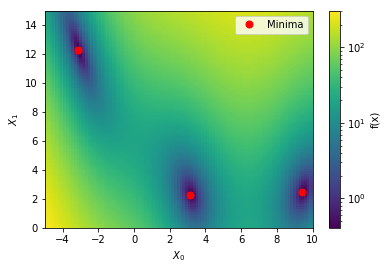

In [6]:
from matplotlib.colors import LogNorm

def plot_branin():
    fig, ax = plt.subplots()

    x1_values = np.linspace(-5, 10, 100)
    x2_values = np.linspace(0, 15, 100)
    x_ax, y_ax = np.meshgrid(x1_values, x2_values)
    vals = np.c_[x_ax.ravel(), y_ax.ravel()]
    fx = np.reshape([branin(val) for val in vals], (100, 100))

    cm = ax.pcolormesh(x_ax, y_ax, fx,
                       norm=LogNorm(vmin=fx.min(), 
                                    vmax=fx.max()))

    minima = np.array([[-np.pi, 12.275], [+np.pi, 2.275], [9.42478, 2.475]])
    ax.plot(minima[:, 0], minima[:, 1], "r.", markersize=14, lw=0, label="Minima")

    cb = fig.colorbar(cm)
    cb.set_label("f(x)")

    ax.legend(loc="best", numpoints=1)

    ax.set_xlabel("$X_0$")
    ax.set_xlim([-5, 10])
    ax.set_ylabel("$X_1$")
    ax.set_ylim([0, 15])

plot_branin()

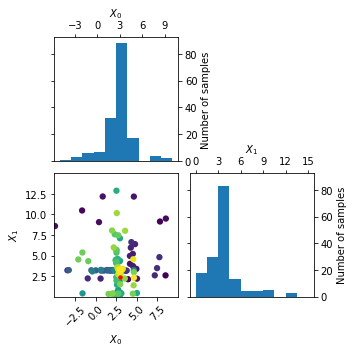

In [7]:
from functools import partial
from skopt.plots import plot_evaluations
from skopt import gp_minimize, forest_minimize, dummy_minimize


bounds = [(-5.0, 10.0), (0.0, 15.0)]
n_calls = 160

forest_res = forest_minimize(branin, bounds, n_calls=n_calls, base_estimator="ET",
                             random_state=4)

_ = plot_evaluations(forest_res, bins=10)

# Minimal example
A minimal example of optimizing hyperparameters of SVC (Support Vector machine Classifier) is given below.

In [8]:
from skopt import BayesSearchCV
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X, y = load_digits(10, True)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)

# log-uniform: understand as search over p = exp(x) by varying x
opt = BayesSearchCV(
    SVC(),
    {
        'C': (1e-6, 1e+6, 'log-uniform'),  
        'gamma': (1e-6, 1e+1, 'log-uniform'),
        'degree': (1, 8),  # integer valued parameter
        'kernel': ['linear', 'poly', 'rbf'],  # categorical parameter
    },
    n_iter=32
)

opt.fit(X_train, y_train)

print("val. score: %s" % opt.best_score_)
print("test score: %s" % opt.score(X_test, y_test))

/home/marcossilva/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/home/marcossilva/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/marcossilva/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/marcossilva/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default va

val. score: 0.985894580549369
test score: 0.9822222222222222


In [9]:
opt.best_params_

{'C': 7.241833529160353, 'degree': 3, 'gamma': 10.0, 'kernel': 'poly'}

# Advanced example
In practice, one wants to enumerate over multiple predictive model classes, with different search spaces and number of evaluations per class. An example of such search over parameters of Linear SVM, Kernel SVM, and decision trees is given below.

In [10]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

from sklearn.datasets import load_digits
from sklearn.svm import LinearSVC, SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

X, y = load_digits(10, True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# pipeline class is used as estimator to enable 
# search over different model types
pipe = Pipeline([
    ('model', SVC())
])

# single categorical value of 'model' parameter is 
# sets the model class
linsvc_search = {
    'model': [LinearSVC(max_iter=10000)],
    'model__C': (1e-6, 1e+6, 'log-uniform'),
}

# explicit dimension classes can be specified like this
svc_search = {
    'model': Categorical([SVC()]),
    'model__C': Real(1e-6, 1e+6, prior='log-uniform'),
    'model__gamma': Real(1e-6, 1e+1, prior='log-uniform'),
    'model__degree': Integer(1,8),
    'model__kernel': Categorical(['linear', 'poly', 'rbf']),
}

opt = BayesSearchCV(
    pipe,
    [(svc_search, 20), (linsvc_search, 16)], # (parameter space, # of evaluations)
)

opt.fit(X_train, y_train)

print("val. score: %s" % opt.best_score_)
print("test score: %s" % opt.score(X_test, y_test))

/home/marcossilva/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/marcossilva/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/marcossilva/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/marcossilva/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify 

val. score: 0.985894580549369
test score: 0.9822222222222222


/home/marcossilva/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


# Progress monitoring and control using callback argument of fit method
It is possible to monitor the progress of BayesSearchCV with an event handler that is called on every step of subspace exploration. For single job mode, this is called on every evaluation of model configuration, and for parallel mode, this is called when n_jobs model configurations are evaluated in parallel.

Additionally, exploration can be stopped if the callback returns True. This can be used to stop the exploration early, for instance when the accuracy that you get is sufficiently high.

An example usage is shown below.

In [11]:
from skopt import BayesSearchCV

from sklearn.datasets import load_iris
from sklearn.svm import SVC

X, y = load_iris(True)

searchcv = BayesSearchCV(
    SVC(),
    search_spaces={'C': (0.01, 100.0, 'log-uniform')},
    n_iter=10
)


# callback handler
def on_step(optim_result):
    score = searchcv.best_score_
    print("best score: %s" % score)
    if score >= 0.98:
        print('Interrupting!')
        return True


searchcv.fit(X, y, callback=on_step)

best score: 0.9666666666666667
best score: 0.98
Interrupting!


/home/marcossilva/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/marcossilva/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/marcossilva/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/marcossilva/anaconda3/lib/python3.7/site-packages/sklearn/svm/ba

BayesSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_iter=10, n_jobs=1, n_points=1,
       optimizer_kwargs=None, pre_dispatch='2*n_jobs', random_state=None,
       refit=True, return_train_score=False, scoring=None,
       search_spaces={'C': (0.01, 100.0, 'log-uniform')}, verbose=0)

# Counting total iterations that will be used to explore all subspaces
Subspaces in previous examples can further increase in complexity if you add new model subspaces or dimensions for feature extraction pipelines. For monitoring of progress, you would like to know the total number of iterations it will take to explore all subspaces. This can be calculated with total_iterations property, as in the code below.

In [12]:
from skopt import BayesSearchCV

from sklearn.datasets import load_iris
from sklearn.svm import SVC

X, y = load_iris(True)

searchcv = BayesSearchCV(
    SVC(),
    search_spaces=[
        ({'C': (0.1, 1.0)}, 19),  # 19 iterations for this subspace
        {'gamma':(0.1, 1.0)}
    ],
    n_iter=23
)

print(searchcv.total_iterations)

42
